In [0]:
import json
import copy
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

np.random.seed(0)

In [0]:
with open('survey_data.json') as json_file:
    data = json.load(json_file)
    
data_robot = data['Data']
data_human = data['Data_Human']

In [0]:
responses_H1_Human = {
    "qCount" : [],
}

responses_H1_Mech = {
    "qCount" : [],
}

responses_H1_Dig = {
    "qCount" : [],
}

responses_H3_Human = {
    "qCount" : [],
}

responses_H3_Robot = {
    "qCount" : [],
}

threshold = 10
#H1:
for sessionKey,sessionValue in data_human.items():
    #check if session has any response in it
    if (len(sessionValue)) > 4:
        #SESSION START
        sessionStartTime = sessionValue['start_time']
        sessionValueCopy = copy.deepcopy(sessionValue)
        for responseKey, responseValue in sessionValue.items():
            #check if is valid response
            if(len(responseKey)) > 15:
                #RESPONSE START
                if len(responseValue) > threshold:
                    responses_H1_Human['qCount'].append(len(responseValue))
  

for sessionKey, sessionValue in data_robot.items():
    if ((len(sessionValue)) > 1) and (sessionValue['SurveySetInfo']['Short_Limit'] > 15) and (sessionValue['SurveySetInfo']['Face_Type'] == "M"):
        sessionStartTime = sessionValue['SurveySetInfo']['Creation_Time']
        sessionValueCopy = copy.deepcopy(sessionValue)
        
        for responseKey, responseValue in sessionValue.items():
            #check if is valid response
            if((len(responseKey)) < 10):
                qCount = 0
                for questionKey, questionValue in responseValue.items():
                    
                    if questionKey.startswith('Q') and (not questionValue['Response'] == "Skip"): qCount += 1
            if qCount >= threshold:
              responses_H1_Mech['qCount'].append(qCount)
                        
for sessionKey, sessionValue in data_robot.items():
    if ((len(sessionValue)) > 1) and (sessionValue['SurveySetInfo']['Short_Limit'] > 15) and (sessionValue['SurveySetInfo']['Face_Type'] == "F"):
        sessionStartTime = sessionValue['SurveySetInfo']['Creation_Time']
        sessionValueCopy = copy.deepcopy(sessionValue)
        
        for responseKey, responseValue in sessionValue.items():
            #check if is valid response
            if((len(responseKey)) < 10):
                qCount = 0
                for questionKey, questionValue in responseValue.items():
                    
                    if questionKey.startswith('Q') and (not questionValue['Response'] == "Skip"): qCount += 1
            if qCount >= threshold:
              responses_H1_Dig['qCount'].append(qCount)
                        
for sessionKey, sessionValue in data_robot.items():
    if ((len(sessionValue)) > 1) and (sessionValue['SurveySetInfo']['Short_Limit'] < 15) and (sessionValue['SurveySetInfo']['Data_Notice']):
        sessionStartTime = sessionValue['SurveySetInfo']['Creation_Time']
        sessionValueCopy = copy.deepcopy(sessionValue)
        
        for responseKey, responseValue in sessionValue.items():
            #check if is valid response
            if((len(responseKey)) < 10):
                qCount = 0
                for questionKey, questionValue in responseValue.items():
                    
                    if questionKey.startswith('Q') and (not questionValue['Response'] == "Skip"): qCount += 1
            if qCount >= threshold:
                responses_H3_Human['qCount'].append(qCount)
                        
for sessionKey, sessionValue in data_robot.items():
    if ((len(sessionValue)) > 1) and (sessionValue['SurveySetInfo']['Short_Limit'] < 15) and (not sessionValue['SurveySetInfo']['Data_Notice']):
        sessionStartTime = sessionValue['SurveySetInfo']['Creation_Time']
        sessionValueCopy = copy.deepcopy(sessionValue)
        
        for responseKey, responseValue in sessionValue.items():
            #check if is valid response
            if((len(responseKey)) < 10):
                qCount = 0
                for questionKey, questionValue in responseValue.items():
                    
                    if questionKey.startswith('Q') and (not questionValue['Response'] == "Skip"): qCount += 1
            if qCount >= threshold:
                responses_H3_Robot['qCount'].append(qCount)

In [0]:
def normalityTest(x):
  stat, p_value = stats.shapiro(x)
  if p_value < 0.05:
    print("Dataset is NOT normally distributed. statistic = " + str(stat) + ", p-value = " + str(p_value) + " < 0.05")
    return p_value, False
  else:
    print("Dataset is normally distributed. statistic = " + str(stat) + ", p-value = " + str(p_value) + " >= 0.05")
    return p_value, True

def varianceHomogeneityTest(x, y):
  _, p_value = stats.levene(x, y)
  if p_value < 0.05:
    print("Variances are NOT equal. p-value = " + str(p_value) + " < 0.05")
    return p_value, False
  else:
    print("Variances are equal. p-value = " + str(p_value) + " >= 0.05")
    return p_value, True

def tTest(x, y, var_homogeneity=True):
  stat, p_value = stats.ttest_ind(x, y, equal_var=var_homogeneity)
  if p_value < 0.05:
    print("Null hypothesis rejected by the Independent T-test. statistic = " + str(stat) + ", p-value = " + str(p_value) + " < 0.05")
  else:
    print("Null hypothesis accepted by the Independent T-test. statistic = " + str(stat) + ", p-value = " + str(p_value) + " >= 0.05")
  if (var_homogeneity == False):
    print("Equal variance not assumed.")
  return statistic, p_value

def uTest(x, y):
  stat, p_value = stats.mannwhitneyu(x, y, alternative="greater")
  if p_value < 0.05:
    print("Null hypothesis rejected by the Mann-Whitney U-test. statistic = " + str(stat) + ", p-value = " + str(p_value) + " < 0.05")
  else:
    print("Null hypothesis accepted by the Mann-Whitney U-test. statistic = " + str(stat) + ", p-value = " + str(p_value) + " >= 0.05")
  return statistic, p_value

def evaluate(x, y, title=""):
  print(title + "\n")
  print("Dataset 1 " + 
        "\n(median, standard deviation, size) (" + str(np.median(x)) + ", " + str(np.std(x)) + ", " + str(len(x)) + ")"
        "\n\nDataset 2 " + 
        "\n(median, standard deviation, size) (" + str(np.median(y)) + ", " + str(np.std(y)) + ", " + str(len(y)) + ")\n")
  if (np.mean(x) > np.mean(y)):
    print("Dataset 1 > Dataset 2\n")
  else:
    print("Dataset 1 < Dataset 2\n")
  _, x_norm = normalityTest(x)
  _, y_norm = normalityTest(y)
  if (x_norm and y_norm):
    _, var_homogeneity = varianceHomogeneityTest(x, y)
    statistic, p_value = tTest(x, y, var_homogeneity)
  else:
    statistic, p_value = uTest(x, y)
  print("\n")
  return statistic, p_value

def plotHistogram(x, title=""):
  plt.figure(figsize=(10,7))
  with plt.style.context('seaborn-darkgrid'): 
    plt.title(title)
    plt.xlabel("Questions Answered")
    plt.ylabel("Frequency")
    plt.hist(x)
  plt.show()

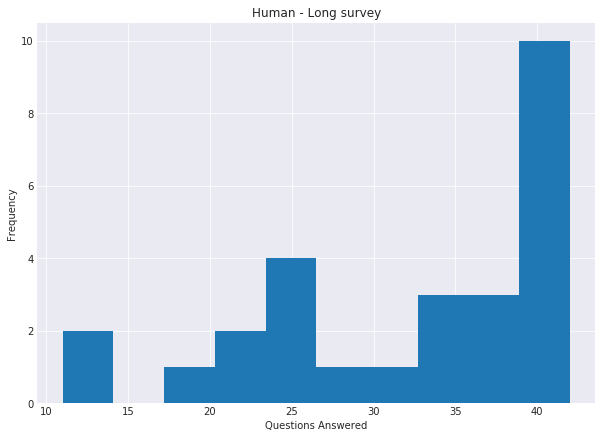

In [45]:
plotHistogram(responses_H1_Human['qCount'], "Human - Long survey")

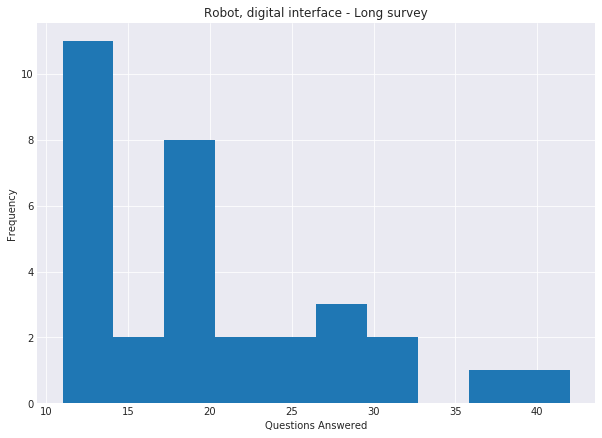

In [46]:
plotHistogram(responses_H1_Dig['qCount'], "Robot, digital interface - Long survey")

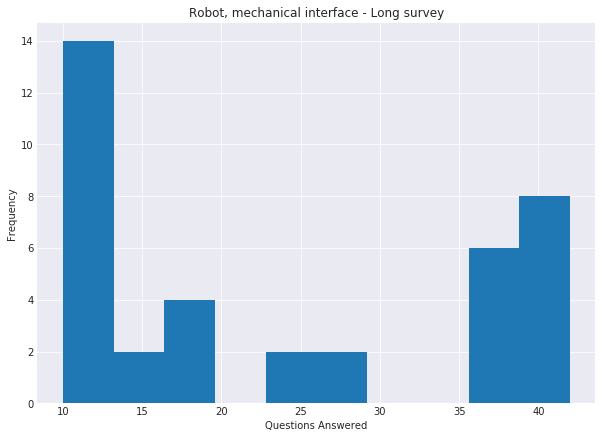

In [47]:
plotHistogram(responses_H1_Mech['qCount'], "Robot, mechanical interface - Long survey")

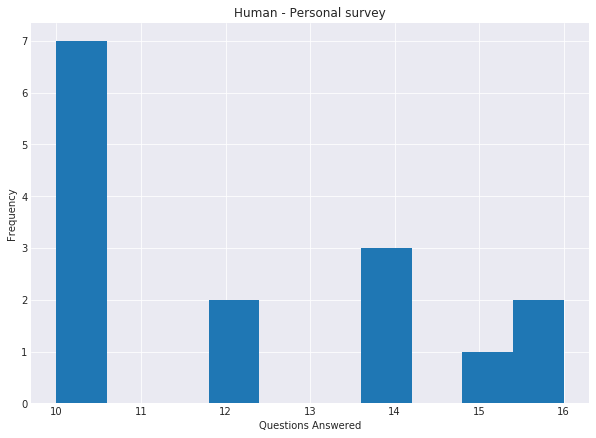

In [48]:
plotHistogram(responses_H3_Human['qCount'], "Human - Personal survey")

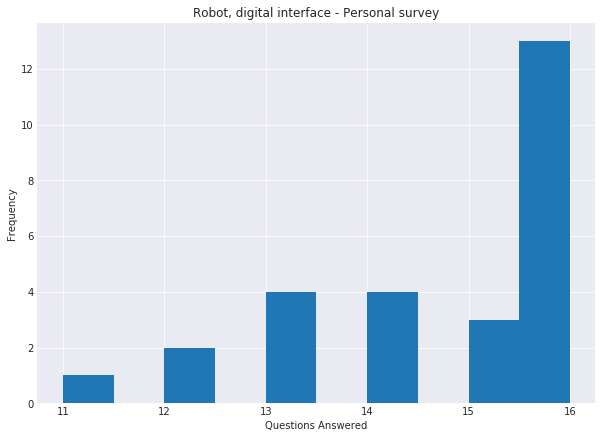

In [49]:
plotHistogram(responses_H3_Robot['qCount'], "Robot, digital interface - Personal survey")

In [69]:
_, _ = evaluate(np.concatenate([responses_H1_Mech['qCount'], responses_H1_Dig['qCount']]), responses_H1_Human['qCount'], "H1 - Robot vs Human")
_, _ = evaluate(responses_H1_Dig['qCount'], responses_H1_Mech['qCount'], "H2 - Digital vs Mech")
_, _ = evaluate(responses_H3_Robot['qCount'], responses_H3_Human['qCount'], "H3 - Robot vs Human")

H1 - Robot vs Human

Dataset 1 
(median, standard deviation, size) (19.5, 10.852715262616474, 70)

Dataset 2 
(median, standard deviation, size) (34.0, 9.555268442427911, 27)

Dataset 1 < Dataset 2

Dataset is NOT normally distributed. statistic = 0.8654149770736694, p-value = 2.134357600880321e-06 < 0.05
Dataset is NOT normally distributed. statistic = 0.8747817873954773, p-value = 0.0037133407313376665 < 0.05
Null hypothesis accepted by the Mann-Whitney U-test. statistic = 463.5, p-value = 0.9999501628363542 >= 0.05


H2 - Digital vs Mech

Dataset 1 
(median, standard deviation, size) (20.0, 7.693087400387442, 32)

Dataset 2 
(median, standard deviation, size) (19.0, 12.62381888828019, 38)

Dataset 1 < Dataset 2

Dataset is NOT normally distributed. statistic = 0.8960342407226562, p-value = 0.004916051402688026 < 0.05
Dataset is NOT normally distributed. statistic = 0.8190373778343201, p-value = 2.6148616598220542e-05 < 0.05
Null hypothesis accepted by the Mann-Whitney U-test. statis